In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 21.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 17.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## EXP 4 - butterfly

In [35]:
sheet_id = '1aqHnDaiRXntyrbj6qaqzR-4XnLbvtKU84FB_JLu5x5A'
sheet_name = 'EXP_4_butterfly'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
data4 = pd.read_csv(url)

In [36]:
data4.head()

,№,CODE,CUP_NUMBER,TEMP,TIME,DEAD,FERT,FERT_NAME,TOTAL,SHOCK_DEAD,SHOCK_ALIVE,SHOCK_NAME
0,1,BC,1,C,NaN,15,44,Dima,59,1,44,Lera
1,2,BC,2,C,NaN,13,48,Dima,61,0,60,Lera
2,3,BC,3,C,NaN,20,55,Dima,75,1,57,Lera
3,4,BC,4,C,NaN,13,51,Dima,64,0,52,Lera
4,5,BC,5,C,NaN,24,45,Dima,69,1,45,Lera


In [37]:
data4['CODE'].unique()

array(['BC', 'B3820', 'B3830', 'B3840', 'B3850'], dtype=object)

In [38]:
data4['FERT_PC'] = data4['FERT'] / (data4['FERT'] + data4['DEAD']) * 100
data4['SHOCK_PC'] = data4['SHOCK_ALIVE'] / (data4['SHOCK_ALIVE'] + data4['SHOCK_DEAD']) * 100

In [39]:
data4.columns

Index(['№', 'CODE', 'CUP_NUMBER', 'TEMP', 'TIME', 'DEAD', 'FERT', 'FERT_NAME',
       'TOTAL', 'SHOCK_DEAD', 'SHOCK_ALIVE', 'SHOCK_NAME', 'FERT_PC',
       'SHOCK_PC'],
      dtype='object')

In [40]:
data4_melted = pd.melt(data4, id_vars=['CODE', 'CUP_NUMBER', 'TEMP', 'TIME'], 
                      value_vars=['FERT_PC', 'SHOCK_PC'],
                      var_name='measurement', value_name='value')

In [41]:
data4_melted.head()

,CODE,CUP_NUMBER,TEMP,TIME,measurement,value
0,BC,1,C,NaN,FERT_PC,74.576271
1,BC,2,C,NaN,FERT_PC,78.688525
2,BC,3,C,NaN,FERT_PC,73.333333
3,BC,4,C,NaN,FERT_PC,79.687500
4,BC,5,C,NaN,FERT_PC,65.217391


<AxesSubplot: xlabel='measurement', ylabel='value'>

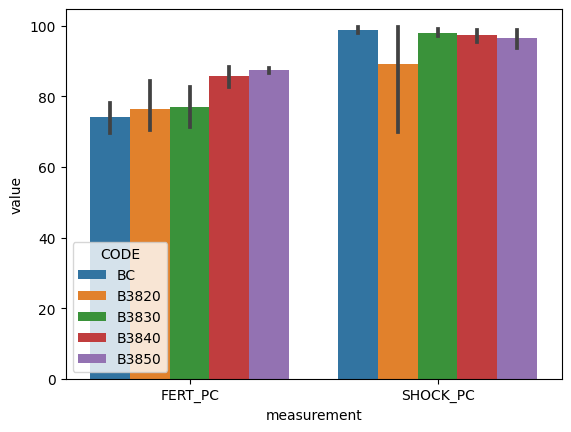

In [46]:
sns.barplot(data4_melted, x='measurement', y='value', hue='CODE')

## EXP 2 - families

In [67]:
sheet_id = '1aqHnDaiRXntyrbj6qaqzR-4XnLbvtKU84FB_JLu5x5A'
sheet_name = 'EXP_2'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
data2 = pd.read_csv(url)

In [68]:
data2.head()

,№,CODE,CUP_NUMBER,FEMALE,MALE,MUT,STAGE,TEMP,TIME,DEAD,...,24_SHOCK_DEAD,24_SHOCK_ALIVE,24_SHOCK_NAME,48_SHOCK_DEAD,48_SHOCK_NAME,HATCHED,HATCHED_NAME,SWIM_DEAD,SWIM_NAME,SWIM
0,1,11CG37120,1,1,1,С,G,37,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,11СG37120,2,1,1,С,G,37,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,3,11СG37120,3,1,1,С,G,37,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,4,11СG37120,4,1,1,С,G,37,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,5,12СG37120,1,1,2,С,G,37,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [69]:
data2_v = data2[(data2['STAGE'] == 'V') | (data2['TEMP'] == 'C')]
data2_v = data2_v.drop(['48_SHOCK_DEAD', '48_SHOCK_NAME'], axis=1)

In [70]:
data2_v.head()

,№,CODE,CUP_NUMBER,FEMALE,MALE,MUT,STAGE,TEMP,TIME,DEAD,...,SHOCK_ALIVE,SHOCK_NAME,24_SHOCK_DEAD,24_SHOCK_ALIVE,24_SHOCK_NAME,HATCHED,HATCHED_NAME,SWIM_DEAD,SWIM_NAME,SWIM
64,65,11СGC,1,1,1,С,G,C,NaN,12.0,...,50.0,Sasha,0.0,NaN,Alya,49.0,Vika,0.0,Vika,49
65,66,11СGC,2,1,1,С,G,C,NaN,6.0,...,38.0,Sasha,1.0,NaN,Alya,36.0,Vika,0.0,Vika,36
66,67,11СGC,3,1,1,С,G,C,NaN,6.0,...,82.0,Sasha,2.0,NaN,Alya,77.0,Vika,4.0,Vika,73
67,68,11СGC,4,1,1,С,G,C,NaN,8.0,...,26.0,Sasha,0.0,NaN,Alya,24.0,Vika,0.0,Vika,24
68,69,12СGC,1,1,2,С,G,C,NaN,11.0,...,14.0,Lera,0.0,NaN,Lera,13.0,Sasha,NaN,NaN,13


In [58]:
data2_v['CODE'].unique()

array(['11СGC', '12СGC', '21СGC', '22СGC', '11MGC', '12MGC', '21MGC',
       '22MGC', '11СV3840', '12СV3840', '21СV3840', '22СV3840',
       '11СV3830', '12СV3830', '21СV3830', '22СV3830', '11MV3840',
       '12MV3840', '21MV3840', '22MV3840', '11MV3830', '12MV3830',
       '21MV3830', '22MV3830'], dtype=object)

In [45]:
data2.columns

Index(['№', 'CODE', 'CUP_NUMBER', 'FEMALE', 'MALE', 'MUT', 'STAGE', 'TEMP',
       'TIME', 'DEAD', 'FERT', 'FERT_NAME', 'TOTAL', 'SHOCK_DEAD',
       'SHOCK_ALIVE', 'SHOCK_NAME', '24_SHOCK_DEAD', '24_SHOCK_ALIVE',
       '24_SHOCK_NAME', '48_SHOCK_DEAD', '48_SHOCK_NAME', 'HATCHED',
       'HATCHED_NAME'],
      dtype='object')

In [71]:
data2['FERT_PC'] = data2['FERT'] / (data2['FERT'] + data2['DEAD']) * 100
data2['SHOCK_PC'] = data2['SHOCK_ALIVE'] / data2['FERT'] * 100
data2['HATCHED_PC'] = data2['HATCHED'] / data2['FERT'] * 100
data2['SWIM_PC'] = data2['SWIM'] / data2['FERT'] * 100

In [73]:
data2_melted = pd.melt(data2, id_vars=['CODE', 'CUP_NUMBER', 'TEMP', 'TIME'], 
                      value_vars=['FERT_PC', 'SHOCK_PC', 'HATCHED_PC', 'SWIM_PC'],
                      var_name='measurement', value_name='value')

In [74]:
data2_melted.head()

,CODE,CUP_NUMBER,TEMP,TIME,measurement,value
0,11CG37120,1,37,120.0,FERT_PC,NaN
1,11СG37120,2,37,120.0,FERT_PC,NaN
2,11СG37120,3,37,120.0,FERT_PC,NaN
3,11СG37120,4,37,120.0,FERT_PC,NaN
4,12СG37120,1,37,120.0,FERT_PC,NaN


/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean o

/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: 

/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: 

/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<AxesSubplot: xlabel='CODE', ylabel='value'>

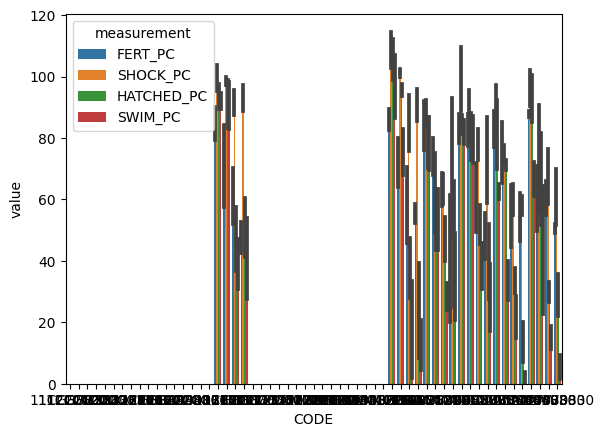

In [75]:
sns.barplot(data2_melted, x='CODE', y='value', hue='measurement')

/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/

/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean o

/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: 

/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: 

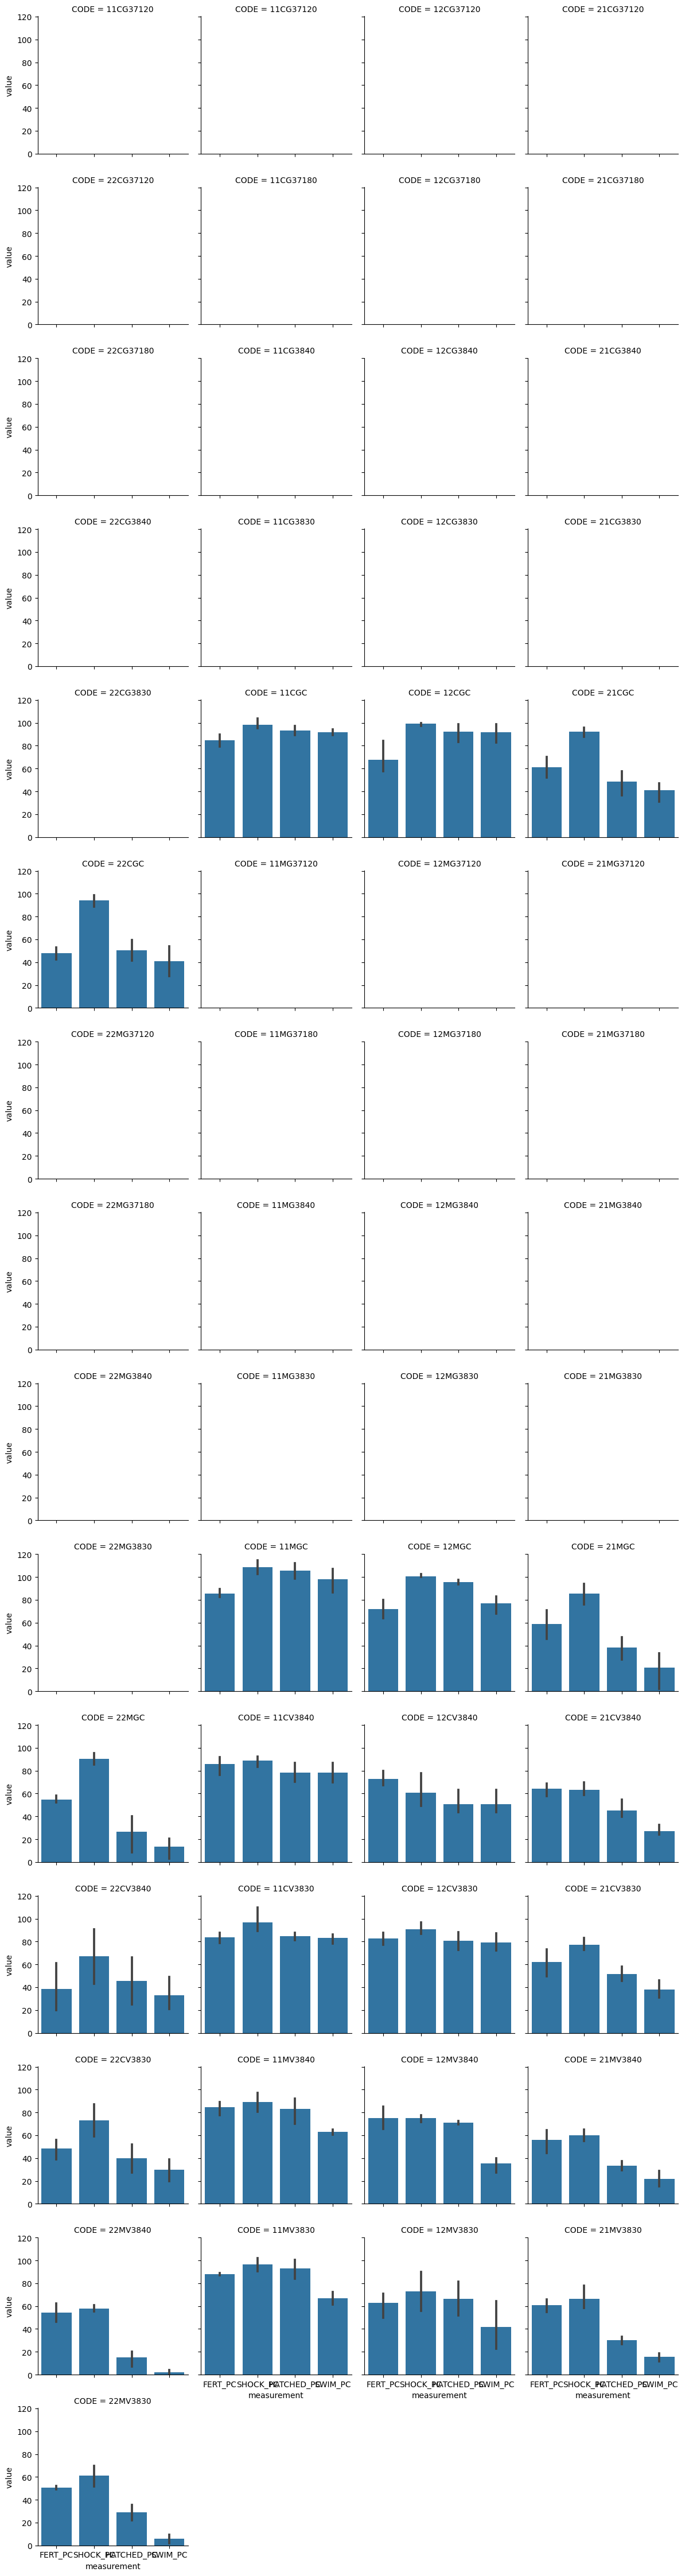

In [83]:
g = sns.FacetGrid(data2_melted, col='CODE', col_wrap=4)
g.map(sns.barplot, "measurement", "value")
g.add_legend()

# EXP 5 main lab

In [2]:
exp5lab = pd.read_csv('../data/2023_FISH_VNIIPRH - EXP_5_main_lab.csv')

In [3]:
exp5lab

,№,CODE,CUP_NUMBER,FEMALE,MALE,MUT,TEMP,TIME,DEAD,FERT,...,SHOCK_ALIVE,SHOCK_NAME,HATCHED_DEAD,HATCHED_ALIVE,HATCHED_NAME,SWIM,SWIM_NAME,Sum_4_cup,swim_perc,Unnamed: 23
0,1,11CC,1,1,1,C,C,NaN,5,37,...,37,Polina,0,37,Sasha,33,Vika,124.0,"89,18918919","82,68975572"
1,2,11CC,2,1,1,C,C,NaN,2,42,...,41,Polina,1,40,Sasha,33,Vika,NaN,"78,57142857",NaN
2,3,11CC,3,1,1,C,C,NaN,5,33,...,31,Polina,2,29,Sasha,26,Vika,NaN,"78,78787879",NaN
3,4,11CC,4,1,1,C,C,NaN,11,38,...,37,Polina,2,35,Sasha,32,Vika,NaN,"84,21052632",NaN
4,5,12CC,1,1,2,C,C,NaN,4,58,...,59,Lera,10,49,Vika,45,Polina,121.0,"77,5862069",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,21M38,4,2,1,M,38,40.0,3,54,...,53,Alya(d)+Lera(a),3,50,Vika,33,Vika,NaN,"61,11111111",NaN
60,61,22M38,1,2,2,M,38,40.0,2,40,...,40,Lera,4,36,Vika,34,Polina,161.0,85,NaN
61,62,22M38,2,2,2,M,38,40.0,2,43,...,40,Lera,4,36,Vika,35,Polina,NaN,"81,39534884",NaN
62,63,22M38,3,2,2,M,38,40.0,0,58,...,55,Lera,1,54,Vika,50,Polina,NaN,"86,20689655",NaN


In [4]:
exp5lab.columns

Index(['№', 'CODE', 'CUP_NUMBER', 'FEMALE', 'MALE', 'MUT', 'TEMP', 'TIME',
       'DEAD', 'FERT', 'FERT_NAME', 'TOTAL', 'FERT_PERC', 'SHOCK_DEAD',
       'SHOCK_ALIVE', 'SHOCK_NAME', 'HATCHED_DEAD', 'HATCHED_ALIVE',
       'HATCHED_NAME', 'SWIM', 'SWIM_NAME', 'Sum_4_cup', 'swim_perc',
       'Unnamed: 23'],
      dtype='object')

In [9]:
exp5lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   №              64 non-null     int64  
 1   CODE           64 non-null     object 
 2   CUP_NUMBER     64 non-null     int64  
 3   FEMALE         64 non-null     int64  
 4   MALE           64 non-null     int64  
 5   MUT            64 non-null     object 
 6   TEMP           64 non-null     object 
 7   TIME           32 non-null     float64
 8   DEAD           64 non-null     int64  
 9   FERT           64 non-null     int64  
 10  FERT_NAME      64 non-null     object 
 11  TOTAL          64 non-null     int64  
 12  FERT_PERC      64 non-null     object 
 13  SHOCK_DEAD     64 non-null     int64  
 14  SHOCK_ALIVE    64 non-null     int64  
 15  SHOCK_NAME     64 non-null     object 
 16  HATCHED_DEAD   64 non-null     int64  
 17  HATCHED_ALIVE  64 non-null     int64  
 18  HATCHED_NAME

In [22]:
sns.set(rc={'figure.figsize':(10,6)})

In [26]:
exp5lab.FEMALE = exp5lab.FEMALE.astype(str)
exp5lab.MALE = exp5lab.MALE.astype(str)

### Fertilisation (family + mutagen)

In [13]:
exp5lab.FERT_PERC = exp5lab.FERT_PERC.str.replace(',', '.')
exp5lab.FERT_PERC = pd.to_numeric(exp5lab.FERT_PERC)

In [29]:
exp5lab['CODE_FERT'] = exp5lab.FEMALE + exp5lab.MALE + exp5lab.MUT

<AxesSubplot: xlabel='CODE_FERT', ylabel='FERT_PERC'>

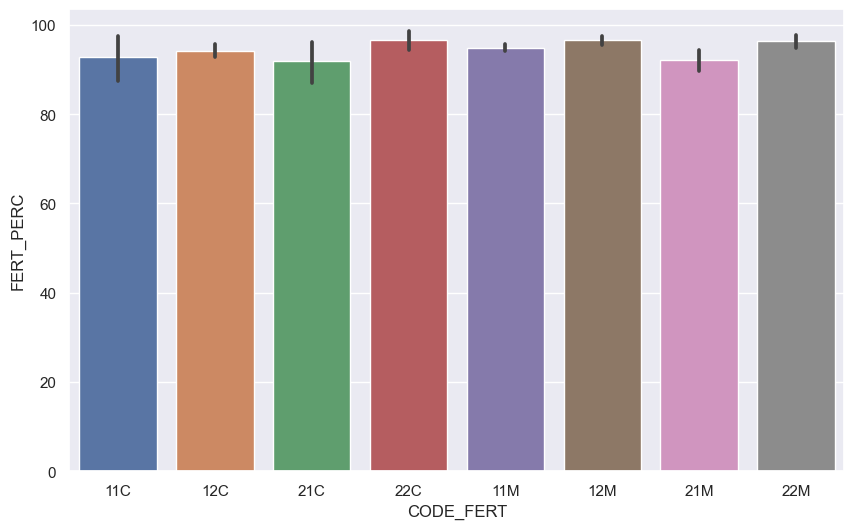

In [30]:
sns.barplot(exp5lab, x='CODE_FERT', y='FERT_PERC')

In [31]:
exp5lab['FAMILY'] = exp5lab.FEMALE + exp5lab.MALE

In [36]:
# Performing two-way ANOVA
model = ols('FERT_PERC ~ FAMILY + MUT + FAMILY:MUT', data=exp5lab).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
FAMILY,175.108020,3.0,3.039415,0.036375
MUT,20.075491,1.0,1.045373,0.310972
FAMILY:MUT,22.238770,3.0,0.386007,0.763491
Residual,1075.431513,56.0,NaN,NaN


The last column (PR) is p-value. Only the **"FAMILY"** factor are statistically significant.

In [41]:
print(pairwise_tukeyhsd(exp5lab.FERT_PERC, exp5lab.FAMILY))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    11     12   1.5909 0.7252 -2.4415 5.6234  False
    11     21  -1.7747 0.6523 -5.8072 2.2577  False
    11     22   2.5907 0.3339 -1.4418 6.6232  False
    12     21  -3.3657 0.1334 -7.3981 0.6668  False
    12     22   0.9998 0.9133 -3.0327 5.0322  False
    21     22   4.3654 0.0289   0.333 8.3979   True
---------------------------------------------------


Statistically significant only **difference between 21 and 22** families.

### Shock (family + mutagen + shock (temp)

In [ ]:
exp5lab.FERT_PERC = exp5lab.FERT_PERC.str.replace(',', '.')
exp5lab.FERT_PERC = pd.to_numeric(exp5lab.FERT_PERC)

### Swim (family + mutagen + shock (temp)

In [42]:
exp5lab.swim_perc = exp5lab.swim_perc.str.replace(',', '.')
exp5lab.swim_perc = pd.to_numeric(exp5lab.swim_perc)

<AxesSubplot: xlabel='CODE', ylabel='swim_perc'>

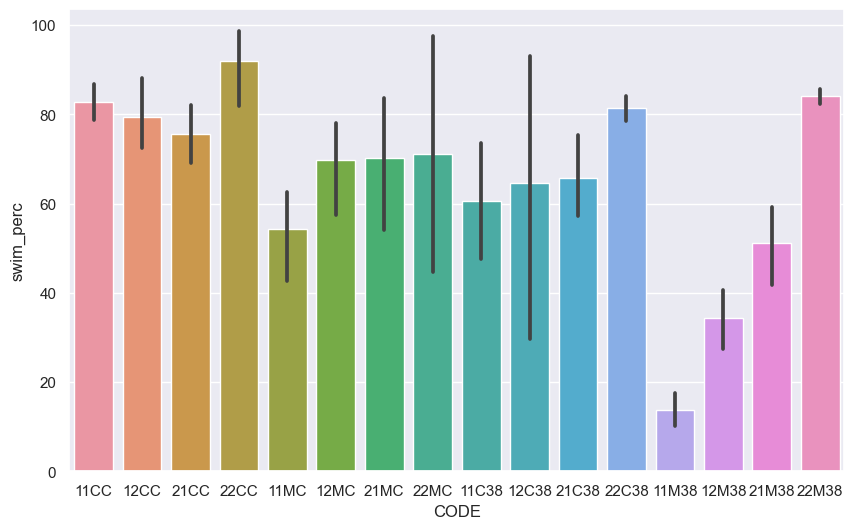

In [43]:
sns.barplot(exp5lab, x='CODE', y='swim_perc')

In [44]:
#perform three-way ANOVA
model = ols("""swim_perc ~ FAMILY + MUT + TEMP +
               FAMILY:MUT + FAMILY:TEMP + MUT:TEMP +
               FAMILY:MUT:TEMP""", data=exp5lab).fit()

sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
FAMILY,7198.173280,3.0,10.402896,0.000022
MUT,5888.160966,1.0,25.528945,0.000007
TEMP,4832.222669,1.0,20.950777,0.000033
FAMILY:MUT,2101.719627,3.0,3.037433,0.037944
FAMILY:TEMP,2411.966796,3.0,3.485806,0.022735
MUT:TEMP,149.740587,1.0,0.649221,0.424365
FAMILY:MUT:TEMP,1258.699320,3.0,1.819089,0.156271
Residual,11071.030340,48.0,NaN,NaN


Statistically significant: **family, mutagen, shock, interaction between family and mutagen, interaction between family and shock**, but not mutagen and shock.

In [45]:
model = ols("""swim_perc ~ FAMILY + MUT + TEMP +
               FAMILY:MUT + FAMILY:TEMP""", data=exp5lab).fit()

sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
FAMILY,7198.173280,3.0,9.997887,0.000026
MUT,5888.160966,1.0,24.535045,0.000008
TEMP,4832.222669,1.0,20.135116,0.000040
FAMILY:MUT,2101.719627,3.0,2.919179,0.042629
FAMILY:TEMP,2411.966796,3.0,3.350096,0.025852
Residual,12479.470246,52.0,NaN,NaN


In [46]:
print(pairwise_tukeyhsd(exp5lab.swim_perc, exp5lab.CODE))

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
 11C38   11CC    22.05 0.7836  -16.7462  60.8462  False
 11C38  11M38 -46.8035  0.006  -85.5997  -8.0073   True
 11C38   11MC  -6.4031    1.0  -45.1993  32.3931  False
 11C38  12C38   3.9479    1.0  -34.8483  42.7441  False
 11C38   12CC  18.6953 0.9245   -20.101  57.4915  False
 11C38  12M38 -26.2507  0.526  -65.0469  12.5455  False
 11C38   12MC   9.0362    1.0    -29.76  47.8324  False
 11C38  21C38   5.1756    1.0  -33.6206  43.9718  False
 11C38   21CC  14.9685 0.9883  -23.8277  53.7647  False
 11C38  21M38  -9.5887 0.9999  -48.3849  29.2075  False
 11C38   21MC   9.5176 0.9999  -29.2786  48.3138  False
 11C38  22C38  20.7157 0.8495  -18.0805  59.5119  False
 11C38   22CC  31.4028  0.241   -7.3934   70.199  False
 11C38  22M38  23.5108 0.6996  -15.2854  62.3071  False
 11C38   22MC  10.4683 0.9998  -28.3279  49.2645

Statistically significant differences between:     
11C38   11M38      
11CC    11M38     
11CC    12M38     
11M38   11MC     
11M38   12C38     
11M38   12CC     
11M38   12MC     
11M38   21C38     
11M38   21CC     
11M38   21MC     
11M38   22C38     
11M38   22CC     
11M38   22M38     
11M38   22MC     
12CC    12M38     
12M38   21CC     
12M38   22C38     
12M38   22CC     
12M38   22M38     
21M38   22CC

# EXP 5 main factory

In [47]:
exp5fac = pd.read_csv('../data/FISH_TABLES/clear_EXP_5_main_factory.csv')

In [48]:
exp5fac

,№,CODE,FEMALE,MALE,MUT,TEMP,TIME,DEAD,FERT,FERT_NAME,...,FERT_PER,HATCHED_DEAD_SAMPLE,HATCHED_SAMPLE,HATCHED_NAME,HATCHED_TOTAL_SAMPLE,HATCHED_PER,SWIM_PER,FERT.1,HATCHED,SWIM
0,1,11CC,1,1,C,C,NaN,38,239,Lera,...,"86,28158845",38,195,Eugene,233,"83,69098712","2,439",42453,35529,1200
1,2,12CC,1,2,C,C,NaN,31,284,Lera,...,"90,15873016",28,401,Eugene,429,"93,47319347","14,677",43736,40881,6000
2,3,21CC,2,1,C,C,NaN,21,275,Lera,...,"92,90540541",31,222,Vika,253,"87,74703557","4,241",61808,54235,2300
3,4,22CC,2,2,C,C,NaN,26,240,Lera,...,"90,22556391",246,7,Eugene,253,"2,766798419","12,043",60025,1661,200
4,5,11MC,1,1,M,C,NaN,24,279,Lera,...,"92,07920792",31,348,Vika,379,"91,82058047","0,303",45306,41600,126
5,6,12MC,1,2,M,C,NaN,144,189,Lera,...,"56,75675676",326,5,Vika,331,"1,510574018","2,608",27926,422,11
6,7,21MC,2,1,M,C,NaN,41,263,Lera,...,"86,51315789",312,3,Eugene,315,"0,9523809524","4,926",57555,548,27
7,8,22MC,2,2,M,C,NaN,20,286,Lera,...,"93,46405229",25,295,NaN,320,"92,1875","3,526",61532,56725,2000
8,9,11C38,1,1,C,38,40.0,38,239,Lera,...,"86,28158845",34,405,Vika,439,"92,25512528","0,694",42453,39165,272
9,10,12C38,1,2,C,38,40.0,31,284,Lera,...,"90,15873016",22,286,Eugene,308,"92,85714286","0,002",43736,40612,1


In [49]:
exp5fac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   №                     16 non-null     int64  
 1   CODE                  16 non-null     object 
 2   FEMALE                16 non-null     int64  
 3   MALE                  16 non-null     int64  
 4   MUT                   16 non-null     object 
 5   TEMP                  16 non-null     object 
 6   TIME                  8 non-null      float64
 7   DEAD                  16 non-null     int64  
 8   FERT                  16 non-null     int64  
 9   FERT_NAME             16 non-null     object 
 10  TOTAL                 16 non-null     int64  
 11  TOTAL_SAMPLE          16 non-null     int64  
 12  FERT_PER              16 non-null     object 
 13  HATCHED_DEAD_SAMPLE   16 non-null     int64  
 14  HATCHED_SAMPLE        16 non-null     int64  
 15  HATCHED_NAME          11 

In [54]:
exp5fac.FEMALE = exp5fac.FEMALE.astype(str)
exp5fac.MALE = exp5fac.MALE.astype(str)

In [55]:
exp5fac['FAMILY'] = exp5fac.FEMALE + exp5fac.MALE

In [56]:
exp5fac['CODE_FERT'] = exp5fac.FEMALE + exp5fac.MALE + exp5fac.MUT

In [60]:
exp5fac.FERT_PER = exp5fac.FERT_PER.str.replace(',', '.')
exp5fac.FERT_PER = pd.to_numeric(exp5fac.FERT_PER)

<AxesSubplot: xlabel='CODE_FERT', ylabel='FERT_PER'>

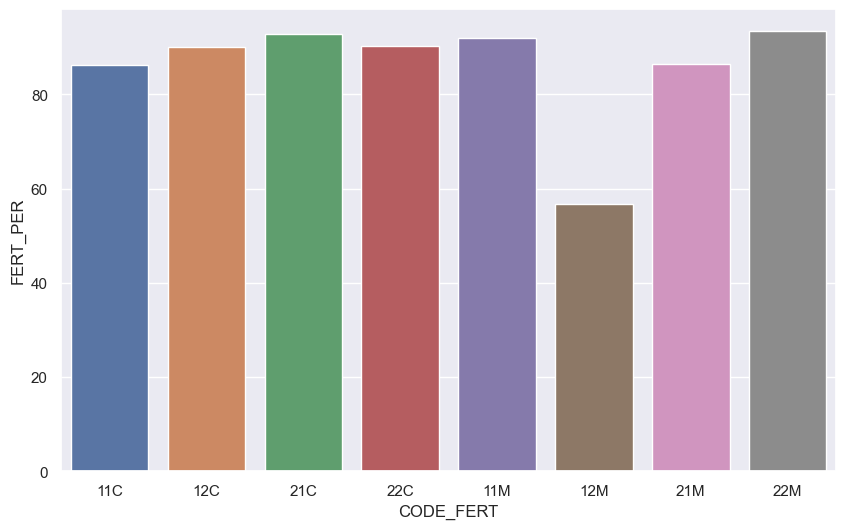

In [61]:
sns.barplot(exp5fac, x='CODE_FERT', y='FERT_PER')

In [64]:
exp5fac.SWIM_PER = exp5fac.SWIM_PER.str.replace(',', '.')
exp5fac.SWIM_PER = pd.to_numeric(exp5fac.SWIM_PER)

<AxesSubplot: xlabel='CODE', ylabel='SWIM_PER'>

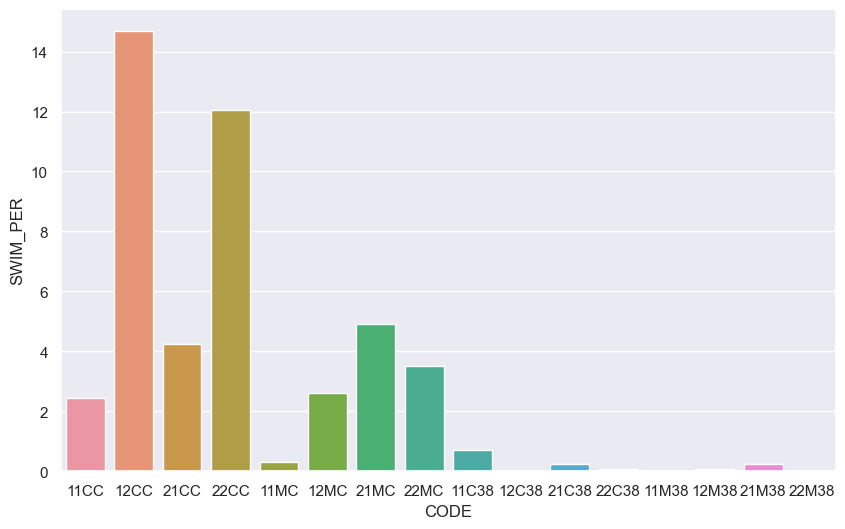

In [65]:
sns.barplot(exp5fac, x='CODE', y='SWIM_PER')

# EXP 8 main lab

# EXP 8 main factory